<a href="https://colab.research.google.com/github/GustavoBD-Dev/StatisticalTechniquesAndDataMining/blob/RegressionModels/RegresionAndTimeSeries/Regression/project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ejercicio 3
Se registra la presión $P$ de un gas a diferentes volúmenes, $V$. La ley de gas ideal es dada por la forma funcional $PV^\gamma = C$ Donde $\gamma$ y $C$ son constantes.

$V(cm^3)$  | 50 | 60 | 70 | 80 | 90
-----------|----|----|----|----|----
 $P(kg/cm^2)$| 64.7 | 51.3 | 40.5 | 25.9 | 7.8

Intuitivamente, podemos adelantar que hay una relación entre Volúmen y Presión.

* ¿Cuál será la relación indónea?
* Estime $\gamma$ y $C$ para tal relación idónea. (Pista: $P_iV^\gamma = Ce_i, i=1,2,3,4,5$)
* Diagnostique su estimación.
* Ahora ¿estime una relación lineal entre volumén y Presión?. También realice el diagnostico de este segundo modelo.
* ¿Cuál modelo recomienda y porqué?


### ¿Cual será la relación idonea?

Como se muestra en la siguiente grafica, donde se puede observar la correlacion de los datos, considerando los valores de la Presión (P) en el eje $y$, y a los valores del Volumén en el eje $x$.
Observamos que existe una correlacion negativo entre estos dos valores: a mayor cantidad de volumen, es menor la presión.

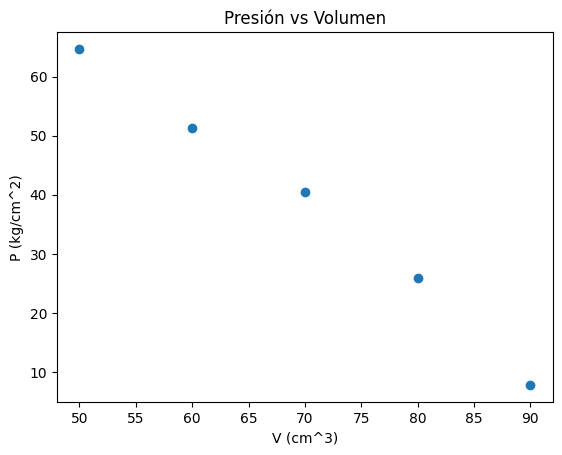

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = {'V': [50, 60, 70, 80, 90],
        'P': [64.7, 51.3, 40.5, 25.9, 7.8]}

df = pd.DataFrame(data)

plt.scatter(df['V'], df['P'])
plt.title('Presión vs Volumen')
plt.xlabel('V (cm^3)')
plt.ylabel('P (kg/cm^2)')
plt.show()


Para afirmar nuestra respuesta obtenemos la matriz de correlacion de los valores, como se muestra a continuación existe una **correlacion negativa** entre los valores de $P$ y $V$.

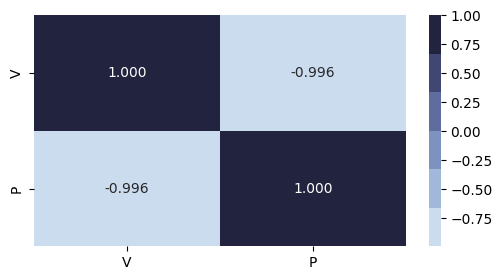

In [ ]:
import seaborn as sns
fig = plt.subplots(1, sharex='col', figsize=(6, 3))
labels = list(df.columns)
matrix = pd.DataFrame(df.corr().values, index=labels, columns=labels)
sns.heatmap(matrix, annot=True, fmt='.3f', cmap=sns.cubehelix_palette(rot=-.1))
plt.show()

Considerando las conclusiones a base las graficas anteriores y la ley del gas ideal, donde nos dice que $PV^\gamma = C$, necesitamos estimar los valores de $\gamma$ y $C$ que mejor se ajusten a los datos.

### Estimación

Considerando $P_iV^\gamma = Ce_i, i=1,2,3,4,5$

Se propone linealizar la ecuación tomando logaritmo natural de ambos lados, para escribir un modelo lineal:

$$P_iV^\gamma = Ce_i$$

$$ln(P_i) = ln(C) - \gamma ln(V_i) + ln(\epsilon_i)$$


In [ ]:
import statsmodels.formula.api as smf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Sample data
V = np.array([50, 60, 70, 80, 90])
P = np.array([64.7, 51.3, 40.5, 25.9, 7.8])

# Create a DataFrame for easier modeling
df = pd.DataFrame({'P': P, 'V': V})

# Fit the linear regression model
model = smf.ols(formula='np.log(P) ~ np.log(V)', data=df).fit()

# Print the model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              np.log(P)   R-squared:                       0.804
Model:                            OLS   Adj. R-squared:                  0.738
Method:                 Least Squares   F-statistic:                     12.30
Date:                Thu, 22 Aug 2024   Prob (F-statistic):             0.0393
Time:                        05:11:22   Log-Likelihood:                -1.5748
No. Observations:                   5   AIC:                             7.150
Df Residuals:                       3   BIC:                             6.369
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     17.0838      3.900      4.380      0.0

/usr/local/lib/python3.10/dist-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


### Diagnostico de la estimación

Como resultado, obtenemos el siguiente modelo ajustado:

$$ln(P_i) = ln(17.083) -3.231ln(V_i) + ln(\epsilon_i)$$


In [ ]:
# coeficiente de correlacion
r_squared = model.rsquared
r = r_squared ** 0.5
print(f'Coeficiente de correlación R: {r}')

Coeficiente de correlación R: 0.8965849288056834


In [ ]:
print("Parameters: ", model.params)
print("R2: ", model.rsquared)

Parameters:  Intercept    17.083833
np.log(V)    -3.231443
dtype: float64
R2:  0.8038645345614923


In [ ]:
df['ln(P)'] = np.log(df['P'])
df['ln(V)'] = np.log(df['V'])
df['ln(P_estimada)'] = model.fittedvalues
df['P_estimada'] = np.exp(df['ln(P_estimada)'])
df['error'] = df['P'] - df['P_estimada']
df

,P,V,ln(P),ln(V),ln(P_estimada),P_estimada,error
0,64.7,50,4.169761,3.912023,4.442353,84.974613,-20.274613
1,51.3,60,3.937691,4.094345,3.853191,47.143247,4.156753
2,40.5,70,3.701302,4.248495,3.355062,28.647368,11.852632
3,25.9,80,3.254243,4.382027,2.923562,18.607458,7.292542
4,7.8,90,2.054124,4.499810,2.542953,12.717173,-4.917173


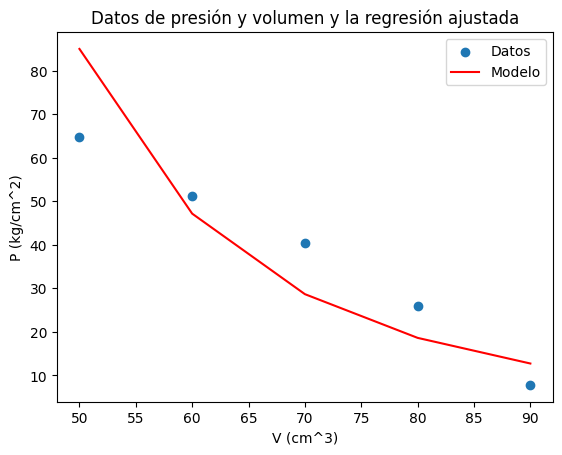

In [ ]:
plt.scatter(df['V'], df['P'])
plt.plot(df['V'], df['P_estimada'], color='red')
plt.title('Datos de presión y volumen y la regresión ajustada')
plt.xlabel('V (cm^3)')
plt.ylabel('P (kg/cm^2)')
plt.legend(['Datos', 'Modelo'])
plt.show()

### Regresion lineal entre Presion y volumen

Al obervar la grafica de dispersión, nos podemos dar cuenta que la distibucion de los datos tiene una correlacion negativa, por lo cual podemos establecer una relacion lineal entre las variables $P$ y $V$, al incrementar los valores de Volumen $V$, disminuyen los valores de Presión $P$. Para ello realizamos una regresion lineal entre estas dos variables de la siguiente forma:

$$P_i = \beta_0 + \beta_1V$$

Con el ajuste del modelo obtenemos:

$$P_i = 153.48 -1.39V$$

In [ ]:
import pandas as pd
import statsmodels.api as sm

X = pd.DataFrame({'beta0' : np.ones(df.shape[0]),
                  'beta1' : df['V']})
Y = df['P']

modelo = sm.OLS(Y, X)
modelo = modelo.fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                      P   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                     345.8
Date:                Thu, 22 Aug 2024   Prob (F-statistic):           0.000339
Time:                        05:01:30   Log-Likelihood:                -10.126
No. Observations:                   5   AIC:                             24.25
Df Residuals:                       3   BIC:                             23.47
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
beta0        135.4800      5.345     25.345      0.0

/usr/local/lib/python3.10/dist-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


### Diagnostico del modelo

In [ ]:
# coeficiente de correlacion
r_squared = modelo.rsquared
r = r_squared ** 0.5
print(f'Coeficiente de correlación R: {r}')

Coeficiente de correlación R: 0.9956908330141262


In [ ]:
print("Parameters: ", model.params)
print("R2: ", model.rsquared)

Parameters:  Intercept    17.083833
np.log(V)    -3.231443
dtype: float64
R2:  0.8038645345614923


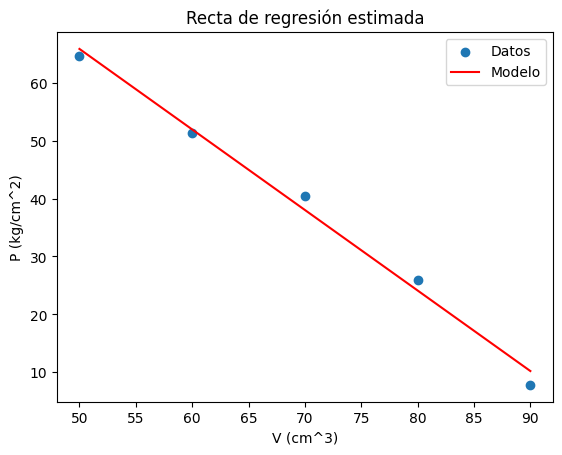

In [ ]:
plt.scatter(df['V'], df['P'])
plt.plot(df['V'], modelo.fittedvalues , color='red')
plt.title('Presión vs Volumen')
plt.xlabel('V (cm^3)')
plt.ylabel('P (kg/cm^2)')
plt.legend(['Datos', 'Modelo'])
plt.title('Recta de regresión estimada')
plt.show()

### ¿Cuál modelo recomienda y porqué?

* Visualmente y por complejdad se recomienda utilizar el modelo de regresión lineal entre Presión y Volumen (segundo modelo), ya que como podemos obervar en los resultados de los valores del coeficiente de correlación $R$, este presenta mejores resultados.
* Este modelo es un modelo simple (principio de parcimonia).
* Graficamente, podemos observar que la recta de regresión se ajusta mejor a los datos.


# ejercicio 9


Journal of Pharmaceutical Sciences presentó en 1991 un articulo sobre la
fracción molar de un soluto a temperatura constante. También se midio la
dispersión, $x_1$, la solubilidad en el enlace bipolar, $x_2$ y, la solubilidad del enlace de hidrogeno, $x_3$. (comentario: en el modelo $y$ es el logaritmo negativo $pH = –log[aH+]$ de la fracción molar).

e) Ajuste un modelo de regresión múltiple, pruebe $H_0: β_0 = β_1 = β_2 = β_3 = _0$.

f) Gráfique los residuales en comparación con $x_1$, $x_2$ y $x_3$ (tres gráficas) Haga un análisis al respecto.

g) Considere los modelos adicionales que compitan con el modelo anterior:

Modelo 2: agregué $x_1^2, x_2^2, x_3^2$ \
Modelo 3: agregue $x_1^2, x_2^2, x_3^2, x_1x_2, x_1x_3, x_2x_3 $


In [ ]:
import pandas as pd
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('/content/data7.csv')
data.head()


,y,x1,x2,x3
0,0.222,7.3,0.0,0.0
1,0.395,8.7,0.0,0.3
2,0.422,8.8,0.7,1.0
3,0.437,8.1,4.0,0.2
4,0.428,9.0,0.5,1.0


### Ajuste del modelo

Para entender mejor a los datos, se realiza la matriz de correlación de las variables $x_1, x_2, x_3$ del conjunto de datos.

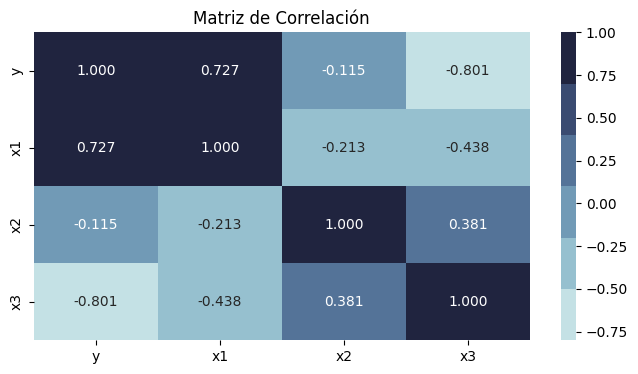

In [ ]:
import seaborn as sns
fig = plt.subplots(1, sharex='col', figsize=(8, 4))
labels = list(data.columns)
matrix = pd.DataFrame(data.corr(method='pearson').values, index=labels, columns=labels)
sns.heatmap(matrix, annot=True, fmt='.3f', cmap=sns.cubehelix_palette(rot=-.2)).set_title('Matriz de Correlación')
plt.show()

Para este ejemplo la ecuación podría ser:
$$ y = \beta_0 + \beta_1 x_1 +\beta_2 x_2 + \beta_3 x_3 + \epsilon_i $$

Para $i = 1, 2, 3, \dots , 20$

Donde:
- $y$ $=-log(x_2)$.
- $\beta_0$ es la intersección.
- $\beta_1$ es el coeficiente de variacion de $x_1$ ().
- $\beta_2$ es el coeficiente de variacion de $x_2$ ().
- $\beta_3$ es el coeficiente de variacion de $x_3$ ().
- $\epsilon$ es el error.



In [ ]:
import statsmodels.api as sm

X = pd.DataFrame({'beta0' : np.ones(data.shape[0]),
                  'beta1' : data['x1'],
                  'beta2' : data['x2'],
                  'beta3' : data['x3']})

y = data['y']

model_1 = sm.OLS(y, X)
results_1 = model_1.fit()
print(results_1.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.869
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     35.28
Date:                Thu, 22 Aug 2024   Prob (F-statistic):           2.77e-07
Time:                        05:20:36   Log-Likelihood:                 30.188
No. Observations:                  20   AIC:                            -52.38
Df Residuals:                      16   BIC:                            -48.39
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
beta0         -0.2689      0.151     -1.779      0.0

In [ ]:
# coeficiente de correlacion
r_squared = results_1.rsquared
r = r_squared ** 0.5
print(f'Coeficiente de correlación R: {r}')

Coeficiente de correlación R: 0.9320319808678121


In [ ]:
print("Parameters: ", results_1.params)
print("R2: ", results_1.rsquared)

Parameters:  beta0   -0.268911
beta1    0.077553
beta2    0.025319
beta3   -0.035752
dtype: float64
R2:  0.8686836133603778




- Conclusión basada en resultado

En la parte de 'coef' se tienen los valores estimados de los parámetros $\beta_0, \beta_1, \beta_2 \ y \ \beta_3$. Es decir:

$$
\hat{y} = y = 0.4442 - 0.0003 x_1 + 0.0218 x_2 - 0.0464 x_3 + \epsilon
$$

Lo que está en la columna de 't' es el estadístico de prueba, P>|t| es el conocido como el P-value, y finalmente las de [0.025, 0.975] que es el intervalo de confianza.

- Intervalos de confianza

El intervalo de confianza para $\beta_0$ es $[0.333, 0.555]$ y para $\beta_1$ es $[0.00035, 0.00045]$.

Es decir, $\beta_0 \in [70.450, 71.973]$ con un 95\% de confianza. Si repetimos el experimento 100 veces, en 95 de estos intervalos se atrapará el verdadero valor de $\beta_0$.

### Demostrar $$ \beta_0 = \beta_1= \beta_2 = \beta_3 = 0$$


VALIDACIÓN

Tomando un $\alpha$ del 5%

La hipotesis nula es:

$H_0 : \beta_i = 0$

para $\beta_0 = 0$; p-valor = 0.094 > 0.05, *no se rechaza $H_0$* lo que quiere decir que $\beta_0 = 0$

para $\beta_1 = 0$; p-valor = 0.000 < 0.05, *se rechaza $H_0$* lo que quiere decir que $\beta_1 \neq 0$

para $\beta_2 = 0$; p-valor = 0.022 < 0.05, *se rechaza $H_0$* lo que quiere decir que $\beta_2 \neq 0$

para $\beta_3 = 0$; p-valor = 0.000 < 0.05, *se rechaza $H_0$* lo que quiere decir que $\beta_3 \neq 0$

Además todas las variables son explicativas en conjunto de nuestra variable respuesta "y".

como llegamos a que $\beta_1 \neq 0, \beta_2 \neq 0$ y $\beta_3 \neq 0$
entonces es falso que $\beta_0 = \beta_1 = \beta_2 = \beta_3 = 0$



### Grafico de residuales

De acuerdo con los graficos, se plantean las siguientes interpretaciones:

- No se visualiza un patrón: Los puntos se distribuyen de manera aleatoria alrededor de la línea horizontal de cero. Esto sugiere que no hay una relación sistemática entre los residuos y las variables $x_1, x_2, x_3$. Podemos decir que el modelo no está subestimando o sobreestimando los valores de la variable dependiente en función de los diferentes valores de $x_1, x_2, x_3$.
- Homocedasticidad: La dispersión de los puntos parece ser constante a lo largo de todo el rango de valores de $x_1, x_2, x_3$. Esto indica que la varianza de los errores es constante, lo cual es un supuesto importante en la regresión lineal.

Implicaciones

- Buen ajuste del modelo: La ausencia de un patrón claro en los residuos sugiere que el modelo de regresión se ajusta razonablemente bien a los datos.
- Supuestos cumplidos: La homocedasticidad observada indica que uno de los supuestos fundamentales de la regresión lineal se cumple en este caso.

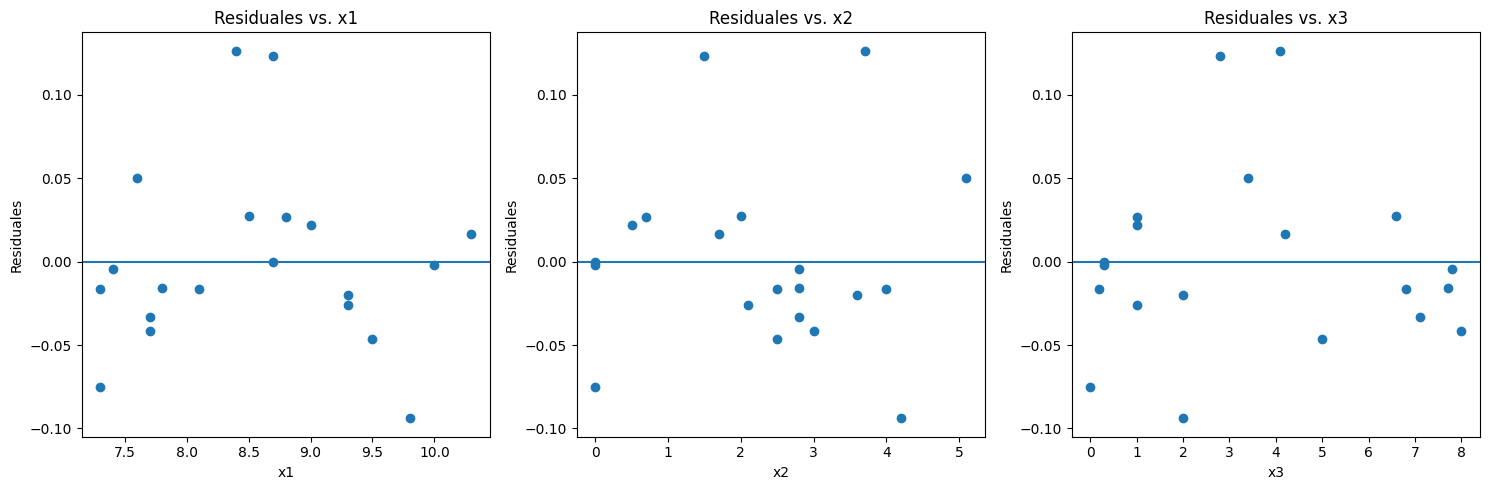

In [ ]:
import matplotlib.pyplot as plt
# Residuales
residuals = results_1.resid

# Gráficas de residuales vs. x1, x2, x3
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].scatter(data['x1'], residuals)
axes[0].axhline(0)
axes[0].set_xlabel('x1')
axes[0].set_ylabel('Residuales')
axes[0].set_title('Residuales vs. x1')

axes[1].scatter(data['x2'], residuals)
axes[1].axhline(0)
axes[1].set_xlabel('x2')
axes[1].set_ylabel('Residuales')
axes[1].set_title('Residuales vs. x2')

axes[2].scatter(data['x3'], residuals)
axes[2].axhline(0)
axes[2].set_xlabel('x3')
axes[2].set_ylabel('Residuales')
axes[2].set_title('Residuales vs. x3')

plt.tight_layout()
plt.show()


## Modelos adicionales

Para el modelo 2:

$$ y = \beta_0 + \beta_1 x_1 +\beta_2 x_2 + \beta_3 x_3 + \beta_4 x_1^2 +\beta_5 x_2^2 + \beta_6 x_3^2 + \epsilon $$

Realizamos el ajuste del modelo

In [ ]:
import statsmodels.api as sm

X = pd.DataFrame({'beta0' : np.ones(data.shape[0]),
                  'beta1' : data['x1'],
                  'beta2' : data['x2'],
                  'beta3' : data['x3'],
                  'beta4' : data['x1']**2,
                  'beta5' : data['x2']**2,
                  'beta6' : data['x3']**2})

y = data['y']

model_2 = sm.OLS(y, X)
results_2 = model_2.fit()
print(results_2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.934
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     30.78
Date:                Thu, 22 Aug 2024   Prob (F-statistic):           5.88e-07
Time:                        04:50:05   Log-Likelihood:                 37.103
No. Observations:                  20   AIC:                            -60.21
Df Residuals:                      13   BIC:                            -53.24
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
beta0         -2.1681      1.161     -1.868      0.0

Para este modelo tenemos:

$$ y = -0.117704 + 0.062156 x_1 + 0.018495 x_2 + 0.023328 x_3 - 0.000648 x_1^2 - 0.001250 x_2^2 + -0.007632 x_3^2 + \epsilon $$

In [ ]:
# coeficiente de correlacion
r_squared = results_2.rsquared
r = r_squared ** 0.5
print(f'Coeficiente de correlación R: {r}')

Coeficiente de correlación R: 0.9665554476429011


In [ ]:
print("Parameters: ", results_2.params)
print("R2: ", results_2.rsquared)

Parameters:  beta0   -2.168065
beta1    0.534591
beta2   -0.004740
beta3    0.023497
beta4   -0.027457
beta5    0.003360
beta6   -0.007031
dtype: float64
R2:  0.934229433368169



### Tercer modelo

$$ y = \beta_0 + \beta_1 x_1 +\beta_2 x_2 + \beta_3 x_3 + \beta_4 x_1^2 +\beta_5 x_2^2 + \beta_6 x_3^2 + \beta_7 x_1 x_2 +\beta_8 x_2 x_3 + \beta_9 x_2 x_3 + \epsilon $$

Realizamos el ajuste del modelo

In [ ]:
import statsmodels.api as sm

X = pd.DataFrame({'beta0' : np.ones(data.shape[0]),
                  'beta1' : data['x1'],
                  'beta2' : data['x2'],
                  'beta3' : data['x3'],
                  'beta4' : data['x1']**2,
                  'beta5' : data['x2']**2,
                  'beta6' : data['x3']**2,
                  'beta7' : data['x1']*data['x2'],
                  'beta8' : data['x1']*data['x3'],
                  'beta9' : data['x2']*data['x3']})

y = data['y']

model_3 = sm.OLS(y, X)
results_3 = model_3.fit()
print(results_3.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.964
Model:                            OLS   Adj. R-squared:                  0.932
Method:                 Least Squares   F-statistic:                     29.97
Date:                Thu, 22 Aug 2024   Prob (F-statistic):           4.49e-06
Time:                        04:50:13   Log-Likelihood:                 43.200
No. Observations:                  20   AIC:                            -66.40
Df Residuals:                      10   BIC:                            -56.44
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
beta0         -2.1260      0.978     -2.173      0.0

Para el modelo 3 tenemos:

$$ y = -0.538180 + 0.114137 x_1 + 0.257167 x_2 + 0.027387 x_3 - 0.001186 x_1^2 - 0.010212 x_2^2 - 0.008434 x_3^2 + \beta_7 x_1 x_2 - 0.023069 x_2 x_3 + 0.001152 x_2 x_3 + \epsilon $$

In [ ]:
# coeficiente de correlacion
r_squared = results_3.rsquared
r = r_squared ** 0.5
print(f'Coeficiente de correlación R: {r}')

Coeficiente de correlación R: 0.981964602589688


In [ ]:
print("Parameters: ", results_3.params)
print("R2: ", results_3.rsquared)

Parameters:  beta0   -2.126019
beta1    0.484850
beta2    0.212965
beta3    0.027800
beta4   -0.022449
beta5   -0.004694
beta6   -0.007771
beta7   -0.020999
beta8   -0.000809
beta9    0.000288
dtype: float64
R2:  0.9642544807391239


* Comparacion de los modelos

De acuerdo con la siguiente tabla,

El modelo 1, es el mas simple, considerando unicamente 3 variables ($x_1, x_2, x_3$), muestra valores de $R$ y $R2$ similares a el modelo 2, el cual esta conformado por variables polinomiales.

El modelo 3 presenta los mejores valores para $R$ y $R2$, sin embargo es el modelo mas complejo al considerar variables polinomiales. Podemos seleccionar este modelo si nuestro objetivo principal es la presicion predictiva.

Por otro lado, si consideramos el principio de la parsimonia, el Modelo 2 tiene una complejidad intermendia comparado con los otros dos modelos, es decir no es tan simple como el modelo 1, y no tan complejo como el modelo 3. Con esto podemos decir que es un modelos que puede ser más facil de interpretar y a su vez es menos propenso al sobreajuste de los datos.


In [ ]:
modelos = pd.DataFrame({'Modelo': ['Modelo 1', 'Modelo 2', 'Modelo 3'],
                       'R2': [results_1.rsquared, results_2.rsquared, results_3.rsquared]})
modelos['R'] = modelos['R2'].apply(lambda x: x ** 0.5)
modelos

,Modelo,R2,R
0,Modelo 1,0.868684,0.932032
1,Modelo 2,0.934229,0.966555
2,Modelo 3,0.964254,0.981965
